In [2]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cwd = os.getcwd()
fall = pd.read_csv(cwd +'/seasons/fall.csv')
spring = pd.read_csv(cwd +'/seasons/spring.csv')
summer = pd.read_csv(cwd +'/seasons/summer.csv')
winter = pd.read_csv(cwd +'/seasons/winter.csv')

In [4]:
delay = winter.append([spring,summer,fall])

In [5]:
delay_type = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
delay_count = [sum(delay['CARRIER_DELAY'].fillna(0)), sum(delay['WEATHER_DELAY'].fillna(0)), \
               sum(delay['NAS_DELAY'].fillna(0)), sum(delay['SECURITY_DELAY'].fillna(0)),\
              sum(delay['LATE_AIRCRAFT_DELAY'].fillna(0))]

In [7]:
delay_count = [int(x) for x  in delay_count]

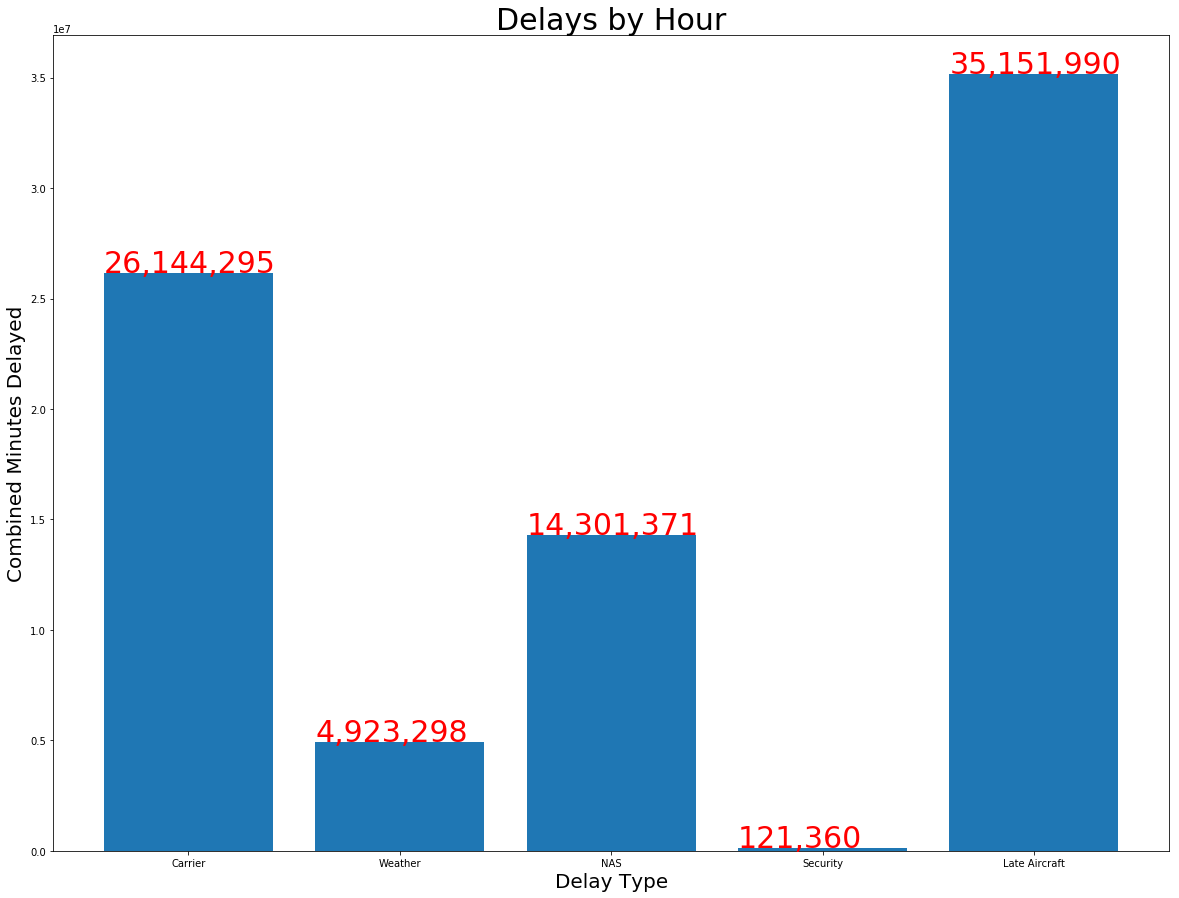

In [9]:
plt.figure(figsize=(20,15))
plt.bar(delay_type, delay_count)
plt.title("Delays by Hour", fontsize =30)
plt.xlabel('Delay Type', fontsize =20)
# plt.xticks([delay_type])
plt.ylabel('Combined Minutes Delayed', fontsize =20)
for a,b in zip(range(5), delay_count):
    plt.text(a - .4, b +50000, str("{:,}".format(int(b))), fontsize =30, color ='r')
plt.show()

In [10]:
# copy df to play with delay columns
type_freq = delay.copy()

In [11]:
# apply 1 if there was a delay and 0 if no delay so can count up frequency
d_type = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
for d in d_type:
    type_freq[d] = type_freq[d].apply(lambda x: 1 if x > 0.0 else 0 )

In [12]:
freq_of_delay = [type_freq[d].sum() for d in d_type]

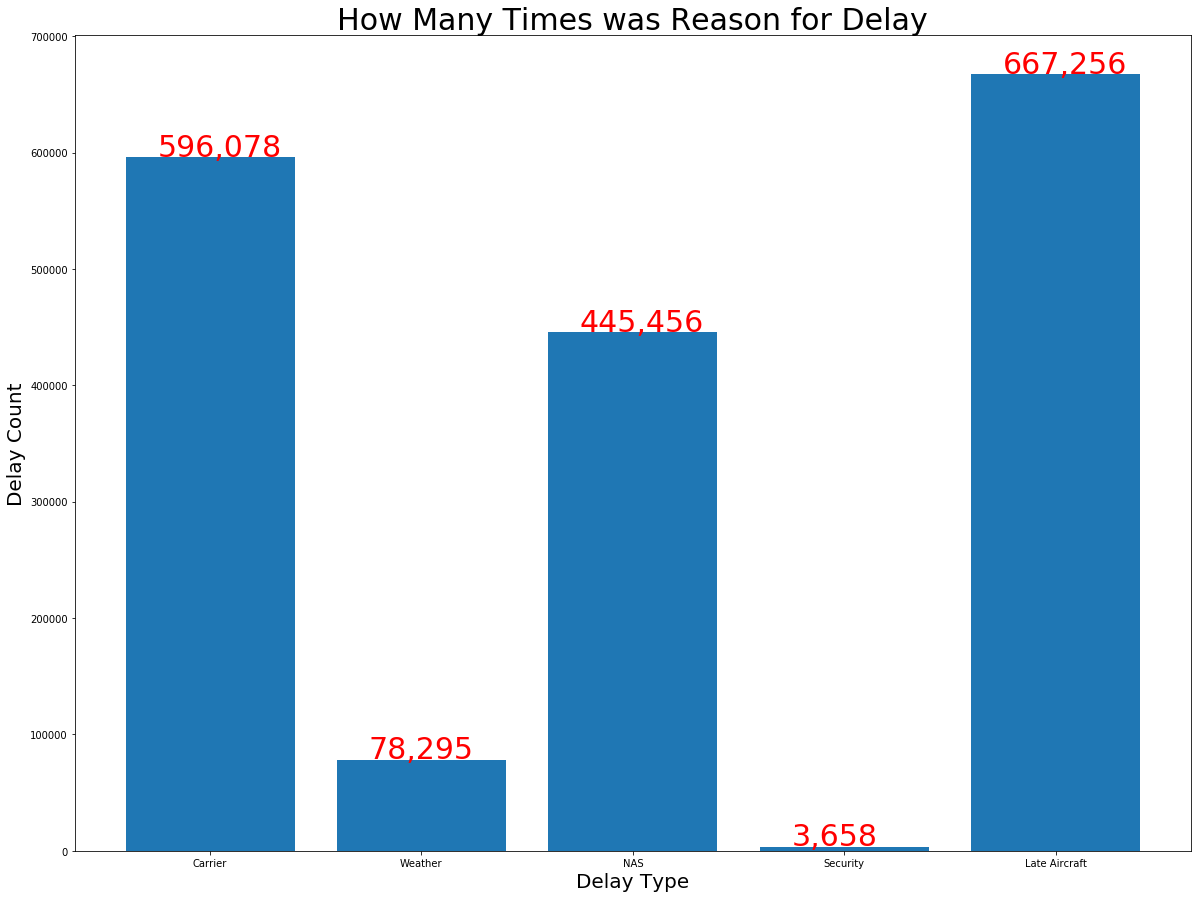

In [13]:
plt.figure(figsize=(20,15))
plt.bar(delay_type, freq_of_delay)
plt.title("How Many Times was Reason for Delay", fontsize =30)
plt.xlabel('Delay Type', fontsize =20)
# plt.xticks([delay_type])
plt.ylabel('Delay Count', fontsize =20)
for a,b in zip(range(5), freq_of_delay):
    plt.text(a - .25, b +1000, "{:,}".format(int(b)), fontsize =30, color ='r')
plt.show()

In [14]:
avg_delay = [round(delay_count[x]/freq_of_delay[x],0) for x in range(5)]

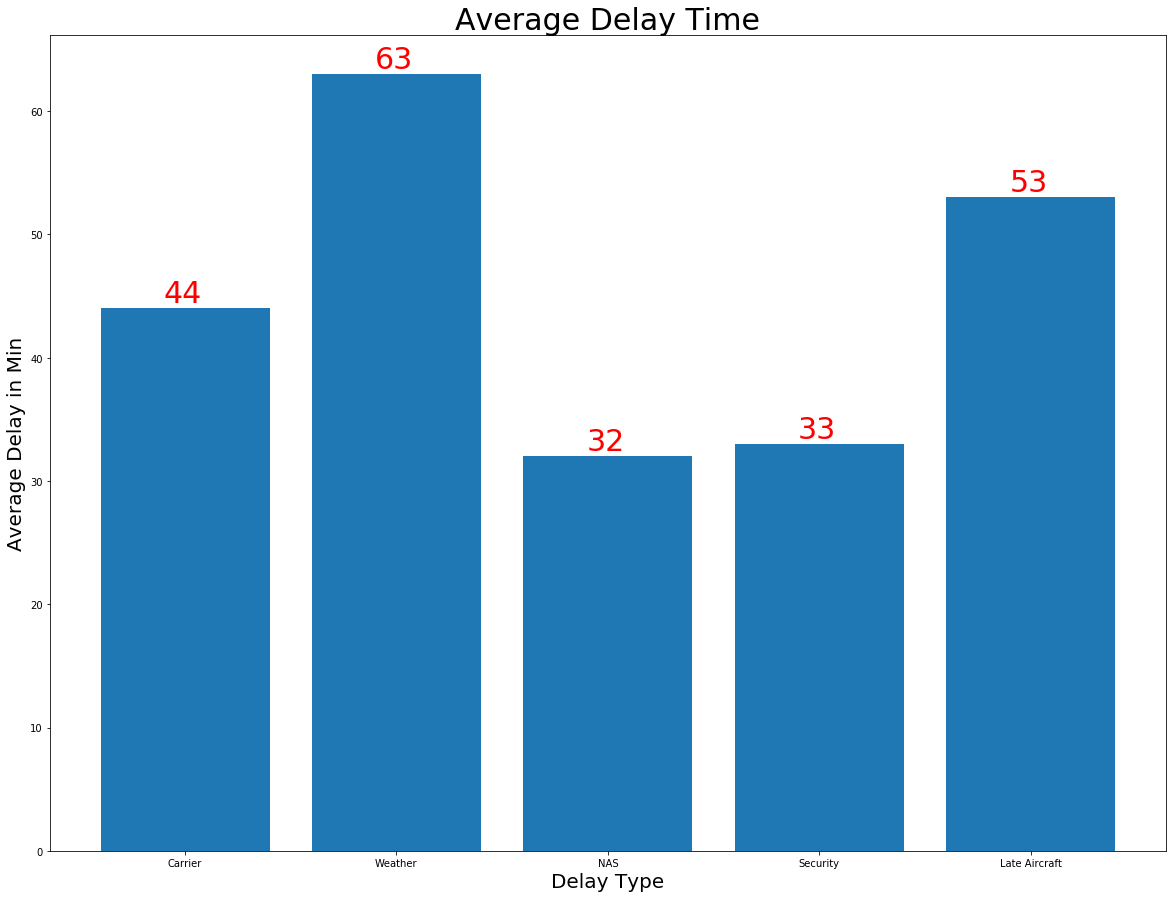

In [15]:
plt.figure(figsize=(20,15))
plt.bar(delay_type, avg_delay )
plt.title("Average Delay Time", fontsize =30)
plt.xlabel('Delay Type', fontsize =20)
# plt.xticks([delay_type])
plt.ylabel('Average Delay in Min', fontsize =20)
for a,b in zip(range(5), avg_delay):
    plt.text(a - .1, b + .5, str(int(b)), fontsize =30, color ='r')
plt.show()

## Carrier Delay

In [29]:
carrier = delay.loc[type_freq['CARRIER_DELAY'] > 0]

In [30]:
len(carrier)

596078

In [31]:
# find how which airline had the most carrier delays
car = sorted(list(set(carrier['OP_UNIQUE_CARRIER'])))
c_ct = carrier['OP_UNIQUE_CARRIER'].value_counts()
carry = [c_ct[x] for x in car]

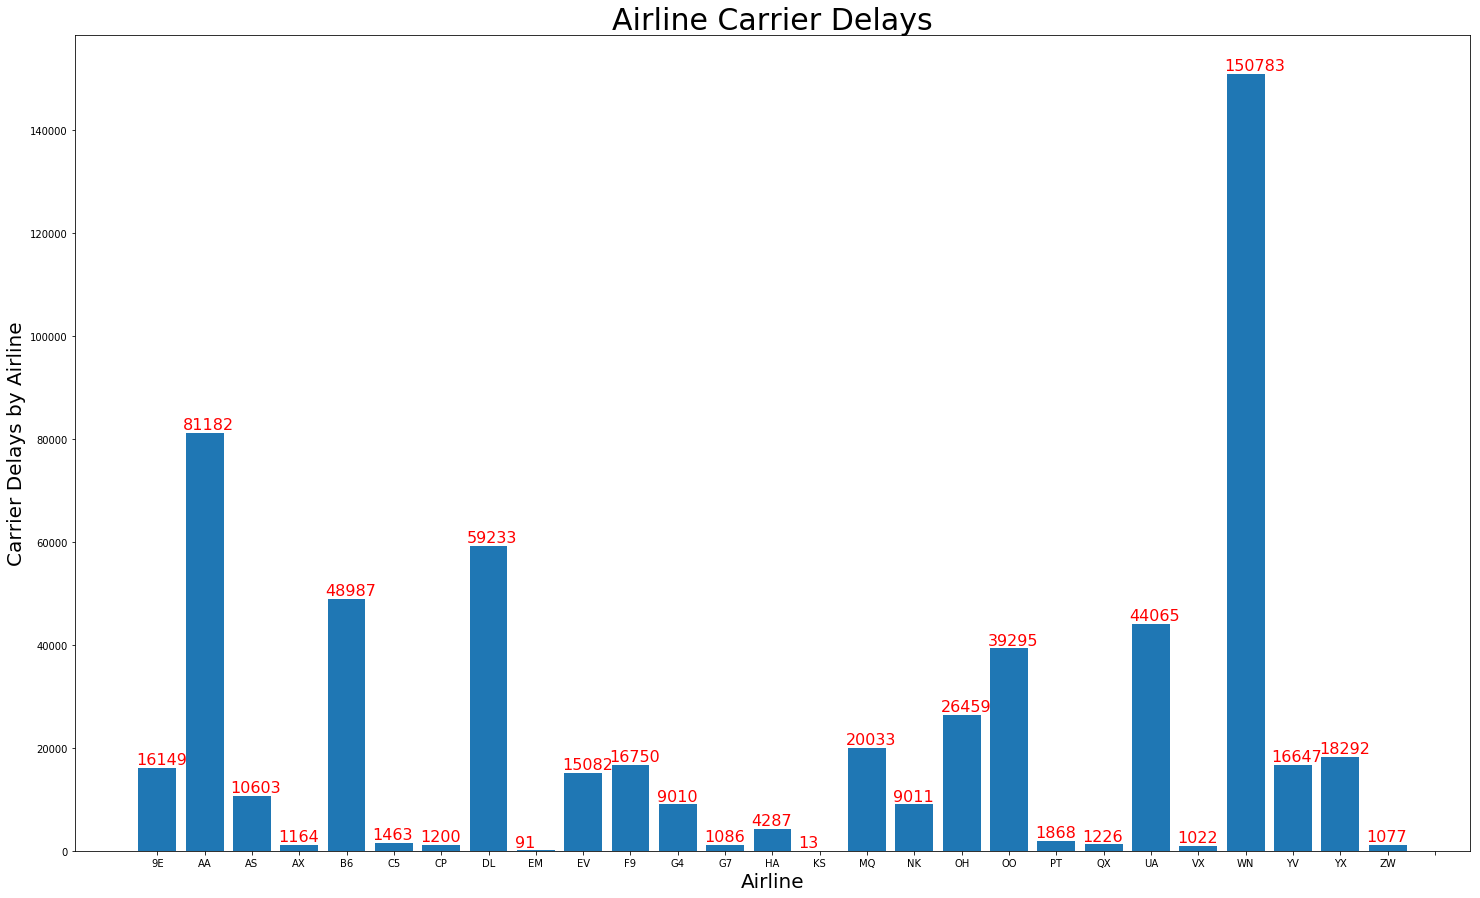

In [49]:
plt.figure(figsize=(25,15))
plt.bar(car, carry)
plt.title("Airline Carrier Delays", fontsize =30)
plt.xlabel("Airline", fontsize =20)
plt.xticks(range(28))
plt.ylabel("Carrier Delays by Airline", fontsize =20)
for a,b in zip(range(28), carry):
    plt.text(a - .45, b + 700, str(b), fontsize =16, color ='r')
plt.show()

In [46]:
# figure out for each carrier, how long their total delays added up to
length_delays = []
for c in car:
    print(type("\'" + c + "\'"))
    airl = carrier[carrier['OP_UNIQUE_CARRIER'] == c ]
    print(airl.head())
    length_delays.append(sum(airl['CARRIER_DELAY']))

<class 'str'>
      YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  HOUR  \
7394  2018      1             1            1  2018-01-01    12   
7395  2018      1             2            2  2018-01-02    12   
7397  2018      1            12            5  2018-01-12     6   
7399  2018      1            18            4  2018-01-18     6   
7400  2018      1            20            6  2018-01-20     6   

     OP_UNIQUE_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM ORIGIN       ...         \
7394                9E   N295PQ               3618    BOS       ...          
7395                9E   N300PQ               3618    BOS       ...          
7397                9E   N8970D               3618    GNV       ...          
7399                9E   N980EV               3618    GNV       ...          
7400                9E   N8775A               3618    GNV       ...          

     CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME  DISTANCE  CARRIER_DELAY  \
7394            154.0               144.0

        YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  HOUR  \
276102  2018     12            31            1  2018-12-31    13   
276103  2018     12            31            1  2018-12-31    10   
276104  2018     12            31            1  2018-12-31    15   
276106  2018     12            31            1  2018-12-31    11   
276107  2018     12            31            1  2018-12-31    12   

       OP_UNIQUE_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM ORIGIN       ...         \
276102                C5   N14198               4997    ORF       ...          
276103                C5   N17169               4995    JAX       ...          
276104                C5   N17169               4994    EWR       ...          
276106                C5   N16147               4991    EWR       ...          
276107                C5   N11181               4983    PQI       ...          

       CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME  DISTANCE  CARRIER_DELAY  \
276102             94.0      

       YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  HOUR  \
25157  2018      1             8            1  2018-01-08     7   
25160  2018      1            13            6  2018-01-13    16   
25161  2018      1            14            7  2018-01-14    16   
25162  2018      1            19            5  2018-01-19    16   
25163  2018      1            26            5  2018-01-26    16   

      OP_UNIQUE_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM ORIGIN       ...         \
25157                HA   N386HA                  1    LAX       ...          
25160                HA   N396HA                  2    HNL       ...          
25161                HA   N381HA                  2    HNL       ...          
25162                HA   N389HA                  2    HNL       ...          
25163                HA   N380HA                  2    HNL       ...          

      CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME  DISTANCE  CARRIER_DELAY  \
25157            375.0               334.0

        YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  HOUR  \
303109  2018     12            21            5  2018-12-21    19   
303111  2018     12            21            5  2018-12-21    21   
303113  2018     12            21            5  2018-12-21    23   
303116  2018     12            21            5  2018-12-21    10   
303118  2018     12            21            5  2018-12-21    12   

       OP_UNIQUE_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM ORIGIN       ...         \
303109                QX   N423QX               2006    SEA       ...          
303111                QX   N422QX               2008    SEA       ...          
303113                QX   N439QX               2010    SEA       ...          
303116                QX   N637QX               2016    SEA       ...          
303118                QX   N435QX               2040    SEA       ...          

       CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME  DISTANCE  CARRIER_DELAY  \
303109             44.0      

        YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  HOUR  \
276126  2018     12            31            1  2018-12-31    10   
276127  2018     12            31            1  2018-12-31    18   
276130  2018     12            31            1  2018-12-31    18   
276132  2018     12            31            1  2018-12-31    22   
276133  2018     12            31            1  2018-12-31    17   

       OP_UNIQUE_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM ORIGIN       ...         \
276126                ZW   N444ZW               4874    ORD       ...          
276127                ZW   N431AW               4872    CVG       ...          
276130                ZW   N449AW               4841    ORD       ...          
276132                ZW   N444ZW               4834    ORD       ...          
276133                ZW   N449AW               4830    TVC       ...          

       CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME  DISTANCE  CARRIER_DELAY  \
276126            106.0      

In [48]:
len(length_delays)

27

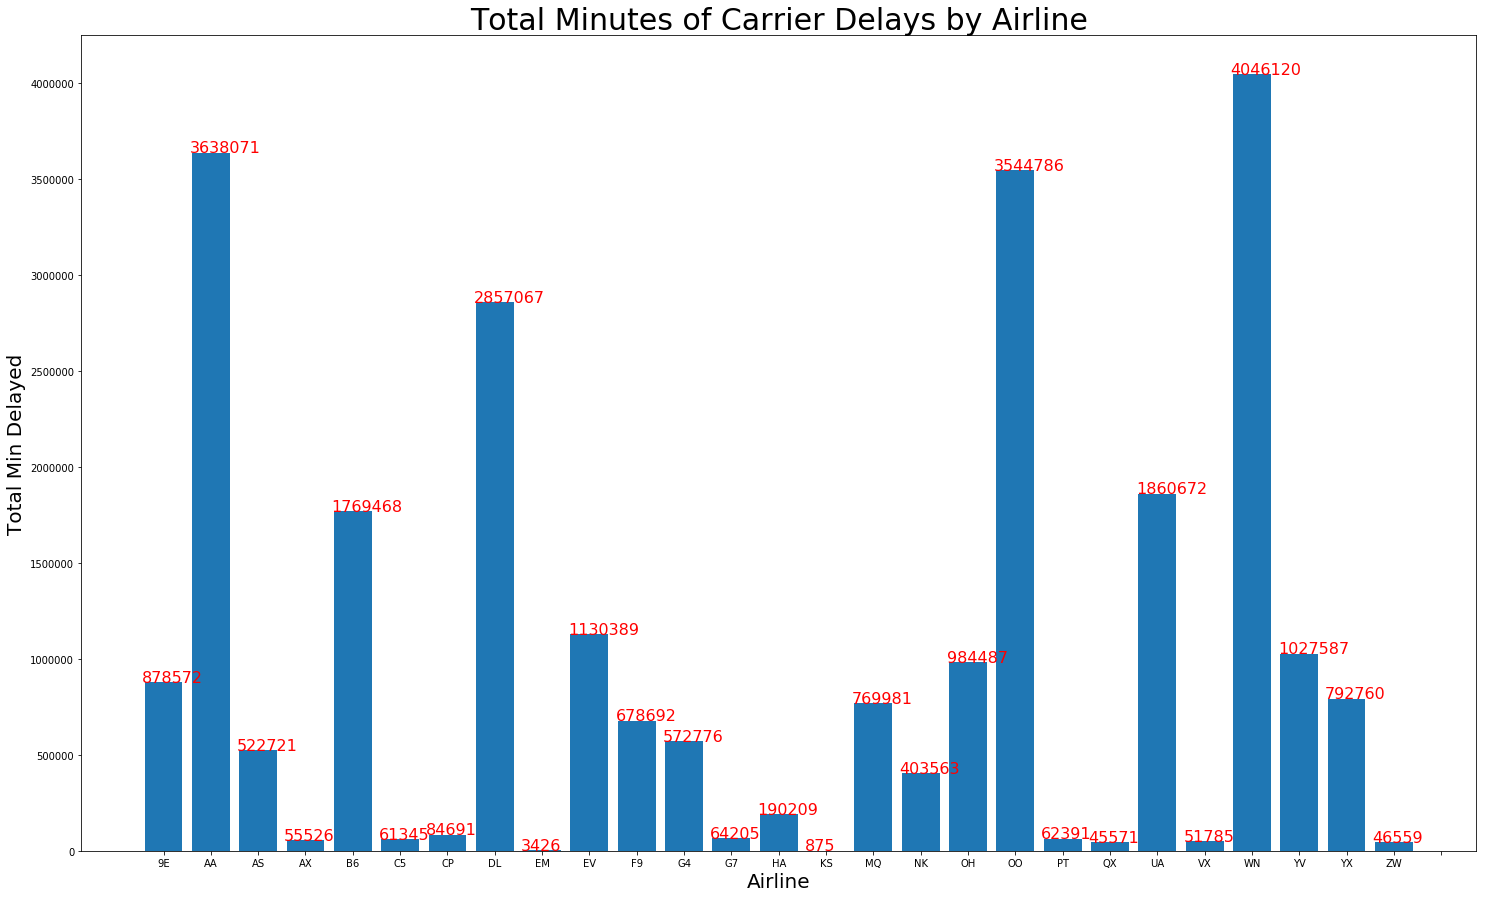

In [61]:
plt.figure(figsize=(25,15))
plt.bar(car, length_delays)
plt.title("Total Minutes of Carrier Delays by Airline", fontsize =30)
plt.xlabel("Airline", fontsize =20)
plt.xticks(range(28))
plt.ylabel("Total Min Delayed", fontsize =20)
for a,b in zip(range(28), length_delays):
    plt.text(a - .45, b + 700, str(int(b)), fontsize =16, color ='r')
plt.show()

In [57]:
avg_delay_line = [round(length_delays[x]/carry[x],0) for x in range(27)]

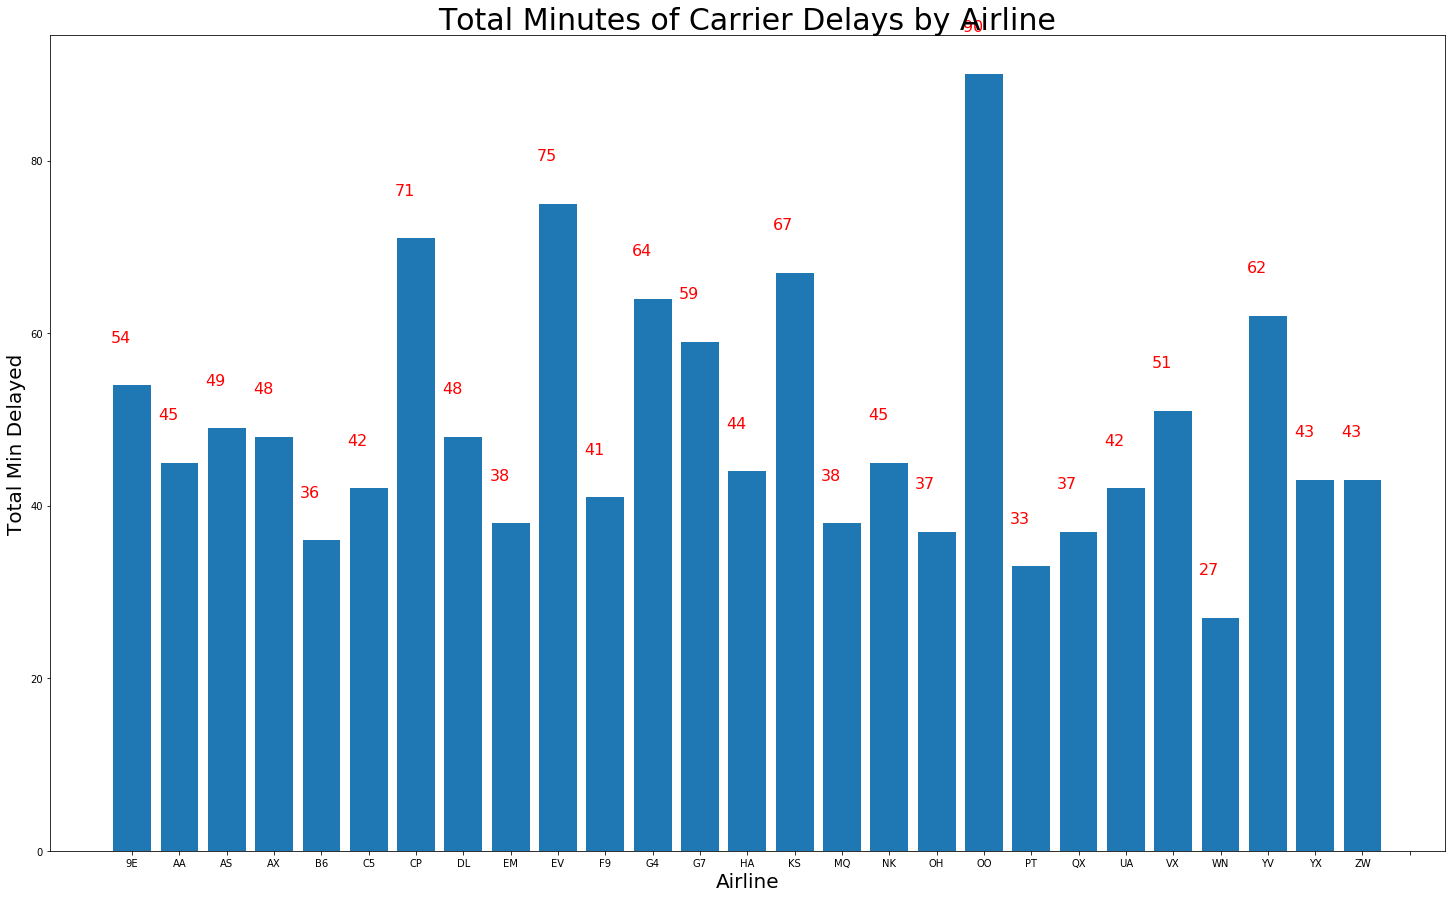

In [62]:
plt.figure(figsize=(25,15))
plt.bar(car, avg_delay_line)
plt.title("Total Minutes of Carrier Delays by Airline", fontsize =30)
plt.xlabel("Airline", fontsize =20)
plt.xticks(range(28))
plt.ylabel("Minutes", fontsize =20)
for a,b in zip(range(28), avg_delay_line):
    plt.text(a - .35, b + 5, str(int(b)), fontsize =16, color ='r')
plt.show()